We use GemGis (Juestel et al) to plot all of the used data for the case study model.

In [10]:
import gemgis as gg
import geopandas as gpd
import pandas as pd
import pyvista as pv

In [3]:
#traces of the cross sections in map view
traces = gpd.read_file('datafig/polylines.shp')

In [5]:
#define trace characteristics and save it to a geodataframe
tr = {'ID' : [1,2,3,4,5,6],
        'zmax' : [1000, 1000, 1000, 1000,1000,1000],
        'zmin' : [-6000, -6000, -6000, -6000, -8000, -8000],
       'name' : traces['name'],
       'geometry': traces['geometry']}

In [6]:
tr_gdf = gpd.GeoDataFrame(tr, geometry = tr['geometry'])

In [7]:
tr_gdf

,ID,zmax,zmin,name,geometry
0,1,1000,-6000,Cross section,"LINESTRING (556689.110 5266493.386, 563681.368..."
1,2,1000,-6000,Cross section,"LINESTRING (563838.334 5275008.493, 574840.917..."
2,3,1000,-6000,Cross section,"LINESTRING (576056.536 5274579.017, 580954.708..."
3,4,1000,-6000,Seismic section 1,"LINESTRING (567827.565 5271362.189, 580109.994..."
4,5,1000,-8000,Seismic section 2,"LINESTRING (566695.735 5257212.458, 566601.707..."
5,6,1000,-8000,Seismic section 3,"LINESTRING (566911.370 5244492.152, 568841.041..."


In [11]:
#create a mesh and then fill in that mesh with texture (images of the cross sections)
meshes = gg.visualization.create_meshes_from_cross_sections(gdf=tr_gdf)
source_files = gg.raster.create_filepaths(dirpath= 'datafig\\figs\\', search_criteria = "profile*.png")
textures = [pv.Texture(file) for file in source_files]

C:\Users\Sofia\.conda\envs\gemgis\lib\site-packages\pyvista\jupyter\notebook.py:56: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


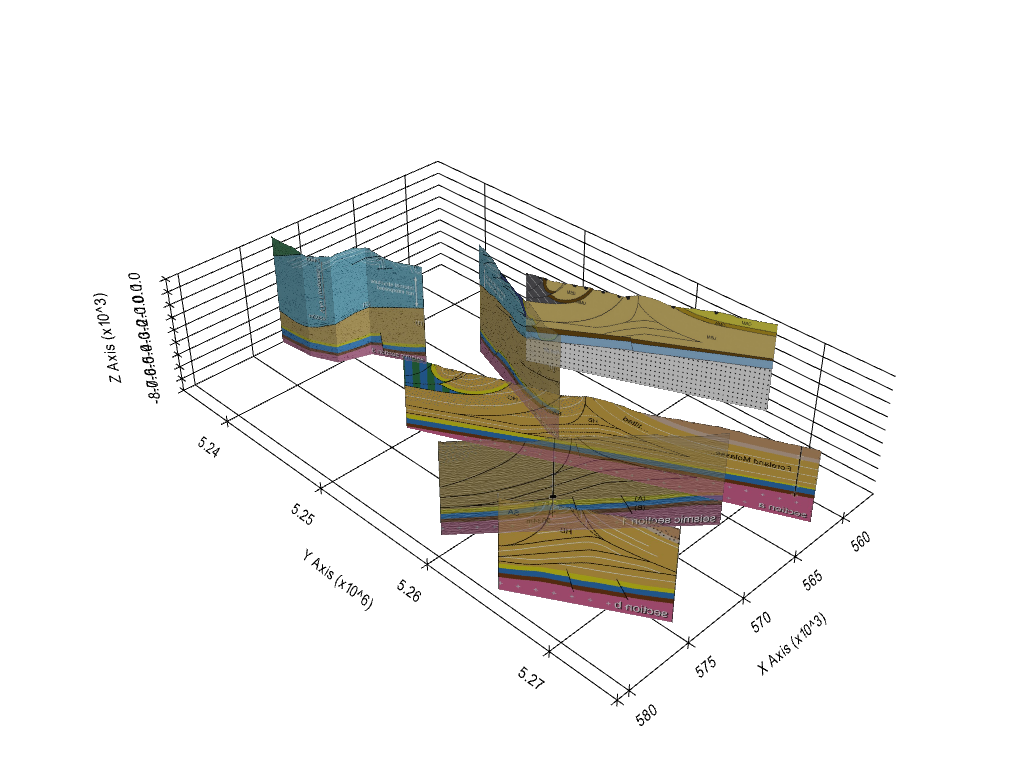

In [14]:
p = pv.Plotter(notebook = True, lighting = 'three_lights')

for i in range(len(meshes)):
    p.add_mesh(meshes[i], texture=textures[i])

p.show_grid(color='black')
p.set_background(color='white')
p.show()
#p.show(screenshot='cross_sections.png')